In [75]:
import pandas as pd 
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
train=pd.read_csv('train.csv').drop('id', axis=1)
test=pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
y_train = train['target']
X_train = train.drop('target', axis=1)

X_test = test.drop('id', axis = 1)

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_train, y_train ):
    strat_Xtrain = X_train.loc[train_index]
    strat_y_train=y_train.loc[train_index]
    strat_Xtest = X_train.loc[test_index]
    strat_y_test=y_train[test_index]
    clf = LogisticRegression(class_weight=None, penalty='l1', C=5, solver='liblinear')
    clf.fit(strat_Xtrain, strat_y_train)
    pred=clf.predict_proba(strat_Xtest)[:,1]
    area=roc_auc_score(strat_y_test,pred)
    print('area under the curve',area)

submission['target'] = clf.predict_proba(X_test)[:,1]
submission.to_csv('subm_logreg.csv', index=False)

area under the curve 0.734375
area under the curve 0.8159722222222222
area under the curve 0.734375


In [ ]:
# logistic regression https://www.kaggle.com/miroslavsabo/auc-0-844-in-11-loc


clf = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear').fit(X_train, y_train)

print(clf.score(X_train,y_train) )
submission['target'] = clf.predict_proba(X_test)[:,1]
submission.to_csv('subm_logreg.csv', index=False)

In [39]:
pd.options.display.max_rows=301

In [40]:
train.corr().target.sort_values()

217      -0.207215
117      -0.197496
91       -0.192536
295      -0.170501
73       -0.167557
80       -0.162558
189      -0.155956
194      -0.150384
16       -0.144267
39       -0.142915
165      -0.142526
129      -0.139439
133      -0.139100
258      -0.138332
230      -0.136263
90       -0.136230
298      -0.134760
220      -0.134738
134      -0.133731
237      -0.133168
150      -0.130454
82       -0.128248
63       -0.127440
209      -0.127391
252      -0.122335
43       -0.121413
239      -0.118166
276      -0.117467
4        -0.114726
108      -0.113875
98       -0.101702
127      -0.101558
227      -0.099268
151      -0.098409
156      -0.097564
26       -0.097438
180      -0.096926
143      -0.094761
15       -0.094138
148      -0.091607
45       -0.090280
292      -0.088930
281      -0.088500
228      -0.086023
9        -0.085947
62       -0.082672
268      -0.082616
198      -0.081124
182      -0.078500
262      -0.077726
144      -0.077675
299      -0.075475
70       -0.

In [34]:
## columns that have correlating higher 0,1 in absolute terms
train.columns[ abs( train.corr().target )>0.1 ]

Index(['target', '0', '4', '13', '16', '17', '24', '30', '33', '39', '43',
       '63', '65', '73', '80', '82', '90', '91', '98', '101', '105', '108',
       '114', '117', '127', '129', '133', '134', '150', '164', '165', '183',
       '189', '194', '199', '201', '209', '217', '220', '226', '230', '237',
       '239', '244', '252', '258', '272', '276', '289', '295', '298'],
      dtype='object')

In [41]:
# other types of correlation
train.corr(method='kendall').target.sort_values()

217      -0.182826
117      -0.171115
91       -0.160292
295      -0.154061
80       -0.133463
73       -0.128407
194      -0.127882
189      -0.127502
16       -0.123677
82       -0.122587
258      -0.118057
63       -0.117919
298      -0.117776
165      -0.111780
133      -0.110502
209      -0.110397
129      -0.107668
134      -0.106392
237      -0.103927
39       -0.103598
108      -0.099959
220      -0.099583
150      -0.099441
230      -0.099250
90       -0.098491
4        -0.092497
43       -0.091835
239      -0.089665
127      -0.089048
45       -0.088923
151      -0.088245
26       -0.086646
9        -0.083332
62       -0.082013
180      -0.081962
276      -0.081921
252      -0.078705
148      -0.077710
281      -0.076722
292      -0.076580
198      -0.076573
211      -0.070438
227      -0.070246
228      -0.070200
132      -0.070059
15       -0.069866
279      -0.069163
262      -0.066561
113      -0.066513
275      -0.065051
143      -0.064624
142      -0.064623
55       -0.

In [67]:
y_train.value_counts()/train.shape[0]

1.0    0.64
0.0    0.36
Name: target, dtype: float64

Text(0, 0.5, 'cumulative explained variance')

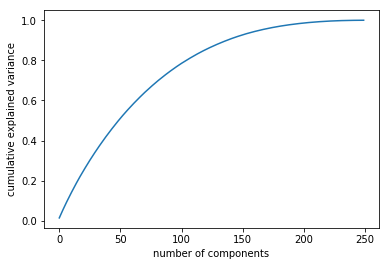

In [47]:
# vanila PCA  does not seem to be very useful
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

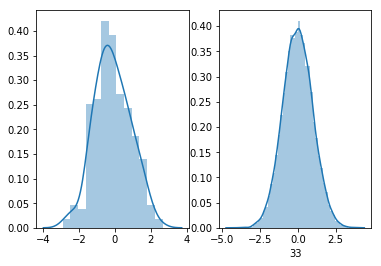

In [21]:
plt.subplots(1,2,sharey=True)
plt.subplot(1,2,1)
sns.distplot( train[['33']] )
plt.subplot(1,2,2)
sns.distplot(test['33'])

In [24]:
y_train==1

0       True
1      False
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10     False
11      True
12      True
13     False
14     False
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22     False
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
220     True
221     True
222     True
223     True
224     True
225    False
226     True
227    False
228    False
229     True
230     True
231     True
232     True
233    False
234    False
235     True
236     True
237     True
238     True
239    False
240    False
241     True
242     True
243    False
244    False
245    False
246    False
247    False
248     True
249    False
Name: target, Length: 250, dtype: bool

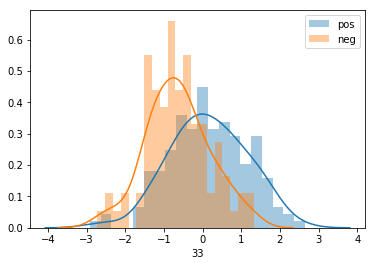

In [33]:
sns.distplot( X_train[y_train==1]['33'], bins=20,label='pos')
sns.distplot( X_train[y_train==0]['33'], bins=20,label='neg')
plt.legend()

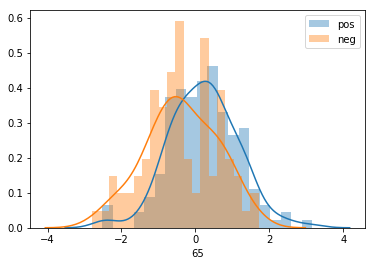

In [34]:
sns.distplot( X_train[y_train==1]['65'], bins=20,label='pos')
sns.distplot( X_train[y_train==0]['65'], bins=20,label='neg')
plt.legend()

## Oversampling 

7110.0

In [70]:
from imblearn.over_sampling import ADASYN, SMOTE

sm=SMOTE(sampling_strategy={0: 7000, 1: 12000})
X_res, y_res = sm.fit_resample(X_train, y_train)

C:\Anaconda\lib\site-packages\imblearn\utils\_validation.py:257: UserWarning: After over-sampling, the number of samples (7000) in class 0 will be larger than the number of samples in the majority class (class #1.0 -> 160)
  n_samples_majority))
C:\Anaconda\lib\site-packages\imblearn\utils\_validation.py:257: UserWarning: After over-sampling, the number of samples (12000) in class 1 will be larger than the number of samples in the majority class (class #1.0 -> 160)
  n_samples_majority))


In [73]:
pd.DataFrame(X_res)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098000,2.165000,0.681000,-0.614000,1.309000,-0.455000,-0.236000,0.276000,-2.246000,1.825000,...,0.867000,1.347000,0.504000,-0.649000,0.672000,-2.097000,1.051000,-0.414000,1.038000,-1.065000
1,1.081000,-0.973000,-0.383000,0.326000,-0.428000,0.317000,1.172000,0.352000,0.004000,-0.291000,...,-0.165000,-1.695000,-1.257000,1.359000,-0.808000,-1.624000,-0.458000,-1.099000,-0.936000,0.973000
2,-0.523000,-0.089000,-0.348000,0.148000,-0.022000,0.404000,-0.023000,-0.172000,0.137000,0.183000,...,0.013000,0.263000,-1.222000,0.726000,1.444000,-1.165000,-1.544000,0.004000,0.800000,-1.211000
3,0.067000,-0.021000,0.392000,-1.637000,-0.446000,-0.725000,-1.035000,0.834000,0.503000,0.274000,...,-0.404000,0.640000,-0.595000,-0.966000,0.900000,0.467000,-0.562000,-0.254000,-0.533000,0.238000
4,2.347000,-0.831000,0.511000,-0.021000,1.225000,1.594000,0.585000,1.509000,-0.012000,2.198000,...,0.898000,0.134000,2.415000,-0.996000,-1.006000,1.378000,1.246000,1.478000,0.428000,0.253000
5,-0.641000,-0.576000,2.493000,0.317000,0.009000,0.428000,-1.887000,2.412000,0.374000,0.734000,...,-0.266000,1.548000,-0.523000,0.923000,0.021000,-0.909000,0.629000,-2.386000,0.265000,0.549000
6,-0.490000,0.557000,-0.881000,0.831000,0.247000,2.316000,1.268000,1.679000,-0.141000,-1.571000,...,1.131000,0.808000,-1.398000,0.053000,0.667000,-1.175000,2.330000,2.104000,0.007000,-1.066000
7,1.252000,-1.370000,-0.196000,2.246000,-0.617000,-0.479000,-0.629000,1.642000,-0.401000,-1.750000,...,-1.978000,2.801000,-1.643000,-0.244000,-0.864000,-0.022000,1.598000,-0.693000,-0.358000,-0.084000
8,1.410000,-1.097000,1.170000,-0.091000,-0.102000,-0.835000,-1.141000,0.355000,-0.513000,-2.165000,...,-1.546000,-0.190000,1.387000,1.021000,-0.912000,0.094000,-0.930000,1.931000,1.190000,0.964000
9,-1.811000,0.566000,-0.406000,-0.490000,-0.985000,-0.303000,1.068000,-0.038000,-0.163000,-0.465000,...,-0.705000,1.045000,-1.281000,-1.727000,-0.969000,-1.367000,0.109000,1.416000,1.472000,1.458000


In [78]:
collections.Counter(y_res)

Counter({1.0: 12000, 0.0: 7000})

## Basic models

In [81]:
# Naive Bayes because mostly not correlated features

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
# nb.fit(X_train, y_train)
nb.fit(X_res, y_res)

print('Naive bayes trian set accuracy', roc_auc_score(y_res, nb.predict_proba(X_res)[:,1]) )

submission['target'] = nb.predict_proba(X_test)[:,1]
submission.to_csv('subm_nb.csv', index=False)

Naive bayes trian set accuracy 0.9972160476190476


In [83]:
# SVM 

from sklearn import svm

sv=svm.SVC(kernel='linear',probability=True)
# sv.fit(X_train, y_train)
sv.fit(X_res, y_res)


print( roc_auc_score(y_train, sv.predict_proba(X_train)[:,1]) )

submission['target'] = sv.predict_proba(X_test)[:,1]
submission.to_csv('subm_svm.csv', index=False)

1.0


In [ ]:
# KNN

In [ ]:
# LDA


In [85]:
## https://www.kaggle.com/featureblind/robust-lasso-patches-with-rfe-gs
import sys, os
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, r2_score, make_scorer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# some heuristic settings
rfe_min_features = 12
rfe_step = 15
rfe_cv = 20
sss_n_splits = 20
sss_test_size = 0.35
grid_search_cv = 20
noise_std = 0.01
r2_threshold = 0.185
random_seed = 213

np.random.seed(random_seed)

# import data
train = pd.read_csv('train.csv')
train_y = train['target']
train_X = train.drop(['id','target'], axis=1).values

test = pd.read_csv('test.csv')
test = test.drop(['id'], axis=1).values

# scale using RobustScaler
# fitting scaler on full data outperforms fitting on test_X only (+0.006 kaggle score)
data = RobustScaler().fit_transform(np.concatenate((train_X, test), axis=0))
train_X = data[:250]
test = data[250:]

# add a bit of noise to train_X to reduce overfitting
train_X += np.random.normal(0, noise_std, train_X.shape)

# define roc_auc_metric robust to only one class in y_pred
def scoring_roc_auc(y, y_pred):
    try:
        return roc_auc_score(y, y_pred)
    except:
        return 0.5

robust_roc_auc = make_scorer(scoring_roc_auc)

# define model and its parameters
model = Lasso(alpha=0.031, tol=0.01, random_state=random_seed, selection='random')

param_grid = {
            'alpha' : [0.022, 0.021, 0.02, 0.019, 0.023, 0.024, 0.025, 0.026, 0.027, 0.029, 0.031],
            'tol'   : [0.0013, 0.0014, 0.001, 0.0015, 0.0011, 0.0012, 0.0016, 0.0017]
        }

# define recursive elimination feature selector
feature_selector = RFECV(model, min_features_to_select=rfe_min_features, scoring=robust_roc_auc, step=rfe_step, verbose=0, cv=rfe_cv, n_jobs=-1)

print("counter | val_mse  |  val_mae  |  val_roc  |  val_cos  |  val_dist  |  val_r2    | feature_count ")
print("-------------------------------------------------------------------------------------------------")

predictions = pd.DataFrame()
counter = 0
# split training data to build one model on each traing-data-subset
for train_index, val_index in StratifiedShuffleSplit(n_splits=sss_n_splits, test_size=sss_test_size, random_state=random_seed).split(train_X, train_y):
    X, val_X = train_X[train_index], train_X[val_index]
    y, val_y = train_y[train_index], train_y[val_index]

    # get the best features for this data set
    feature_selector.fit(X, y)
    # remove irrelevant features from X, val_X and test
    X_important_features        = feature_selector.transform(X)
    val_X_important_features    = feature_selector.transform(val_X)
    test_important_features     = feature_selector.transform(test)

    # run grid search to find the best Lasso parameters for this subset of training data and subset of features 
    grid_search = GridSearchCV(feature_selector.estimator_, param_grid=param_grid, verbose=0, n_jobs=-1, scoring=robust_roc_auc, cv=20)
    grid_search.fit(X_important_features, y)

    # score our fitted model on validation data
    val_y_pred = grid_search.best_estimator_.predict(val_X_important_features)
    val_mse = mean_squared_error(val_y, val_y_pred)
    val_mae = mean_absolute_error(val_y, val_y_pred)
    val_roc = roc_auc_score(val_y, val_y_pred)
    val_cos = cosine_similarity(val_y.values.reshape(1, -1), val_y_pred.reshape(1, -1))[0][0]
    val_dst = euclidean_distances(val_y.values.reshape(1, -1), val_y_pred.reshape(1, -1))[0][0]
    val_r2  = r2_score(val_y, val_y_pred)

    # if model did well on validation, save its prediction on test data, using only important features
    # r2_threshold (0.185) is a heuristic threshold for r2 error
    # you can use any other metric/metric combination that works for you
    if val_r2 > r2_threshold:
        message = '<-- OK'
        prediction = grid_search.best_estimator_.predict(test_important_features)
        predictions = pd.concat([predictions, pd.DataFrame(prediction)], axis=1)
    else:
        message = '<-- skipping'


    print("{0:2}      | {1:.4f}   |  {2:.4f}   |  {3:.4f}   |  {4:.4f}   |  {5:.4f}    |  {6:.4f}    |  {7:3}         {8}  ".format(counter, val_mse, val_mae, val_roc, val_cos, val_dst, val_r2, feature_selector.n_features_, message))
    
    counter += 1

print("-------------------------------------------------------------------------------------------------")
print("{}/{} models passed validation threshold and will be ensembled.".format(len(predictions.columns), sss_n_splits))

mean_pred = pd.DataFrame(predictions.mean(axis=1))
mean_pred.index += 250
mean_pred.columns = ['target']
mean_pred.to_csv('submission.csv', index_label='id', index=True)        
       
# Liked the kernel?
# Replace Lasso with other regressors, play with heuristics and let us all know the results!
# Please leave a comment if you found this Kerlen useful. I would like to learn from you too!


counter | val_mse  |  val_mae  |  val_roc  |  val_cos  |  val_dist  |  val_r2    | feature_count 
-------------------------------------------------------------------------------------------------
 0      | 0.1970   |  0.3972   |  0.7394   |  0.8325   |  4.1641    |  0.1485    |  120         <-- skipping  
 1      | 0.1873   |  0.3825   |  0.7651   |  0.8405   |  4.0594    |  0.1908    |  210         <-- OK  
 2      | 0.1914   |  0.3783   |  0.7651   |  0.8391   |  4.1044    |  0.1727    |   12         <-- skipping  
 3      | 0.1917   |  0.3866   |  0.7695   |  0.8371   |  4.1074    |  0.1715    |   15         <-- skipping  
 4      | 0.1965   |  0.3611   |  0.7561   |  0.8372   |  4.1588    |  0.1507    |   30         <-- skipping  
 5      | 0.1765   |  0.3520   |  0.8002   |  0.8508   |  3.9408    |  0.2374    |   45         <-- OK  
 6      | 0.2089   |  0.3844   |  0.6914   |  0.8215   |  4.2877    |  0.0972    |  270         <-- skipping  
 7      | 0.1603   |  0.3498   |  0.838